In [1]:
%matplotlib inline

In [2]:
import pandas as pd
import pickle
import matplotlib.pyplot as plt

In [3]:
df_ic = pd.ExcelFile("/home/mim/ICLE_essay_Wprompt.xlsx")
df = df_ic.parse("Sheet1")
len(df)

1003

In [46]:
df_as = pd.read_csv("../data/ArgumentStrengthScores.txt", delimiter="\t", header=None)
df_as.columns = "essay_id score".split()
df_pa = pd.read_csv("../data/PromptAdherenceScores.txt", delimiter="\t", header=None)
df_pa.columns = "essay_id score".split()
df_tc = pd.read_csv("../data/ThesisClarityScores.txt", delimiter="\t", header=None)
df_tc.columns = "essay_id score".split()

def get_scores(x):
    s_as, s_pa, s_tc = [
        list(df_x[df_x.essay_id == x["Essay Number"]].score)[0]
        if len(df_x[df_x.essay_id == x["Essay Number"]].score) > 0 else
        None
        for df_x in [df_as, df_pa, df_tc]
    ]
    
    return pd.Series([s_as, s_pa, s_tc])

df[["argument_strength", "prompt_adherence", "thesis_clarity"]] = df.apply(get_scores, axis=1)
assert(len(df[pd.notna(df.argument_strength)]) == 1000)
assert(len(df[pd.notna(df.prompt_adherence)]) == 830)
assert(len(df[pd.notna(df.thesis_clarity)]) == 830)

AssertionError: 

In [48]:
df.argument_strength

0       2.5
1       3.0
2       3.0
3       3.0
4       2.5
5       3.0
6       2.5
7       2.5
8       3.0
9       3.0
10      4.0
11      2.0
12      2.0
13      2.5
14      2.0
15      2.0
16      3.0
17      2.5
18      3.0
19      2.5
20      2.5
21      2.5
22      3.5
23      3.0
24      3.0
25      3.0
26      2.5
27      3.5
28      2.0
29      3.5
       ... 
973     3.0
974     3.5
975     2.5
976     3.0
977     2.0
978     3.0
979     1.5
980     2.5
981     2.0
982     3.0
983     2.5
984     2.0
985     3.5
986     2.5
987     2.5
988     2.0
989     1.5
990     2.5
991     3.0
992     2.0
993     2.0
994     1.5
995     2.5
996     3.0
997     3.0
998     NaN
999     NaN
1000    3.5
1001    3.5
1002    NaN
Name: argument_strength, Length: 1003, dtype: float64

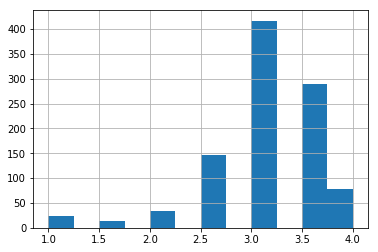

In [8]:
df["Organization"].hist(bins=12)

In [5]:
df["Prompt"].head()

0    Some people say that in our modern world, domi...
1    Most University degrees are theoretical and do...
2    Some people say that in our modern world, domi...
3    Most University degrees are theoretical and do...
4    Some people say that in our modern world, domi...
Name: Prompt, dtype: object

In [11]:
df["Essay Number"].head()

0    BGSU1001
1    BGSU1002
2    BGSU1003
3    BGSU1004
4    BGSU1005
Name: Essay Number, dtype: object